In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Abstract

Ensuring worldwide food safety and security is a major target by the UN and WHO, especially in recent years due to the Covid-19 pandemic and the Ukraine war. In this project, we used a multiple linear regression model to predict the **prevalence of undernourishment** in individual countries based on the country's **socio-economic indicators** in 2020. Our dataset consisted of **133 examples** with 94 examples in the training set and 39 examples in the test set. Through visualization and analysis of multicollinearity matrices, we selected 4 indicators as our final independent variables: net FDI flow, proportion of access to electricity, fertility rate, and corruption perception index. Our model achieved an **adjusted R<sup>2</sup> score of 0.73**, and through further analysis, we concluded that TODO is the most significant indepdent variable.

## Background

### Problem statement 
How might we predict **food insecurity** in a country based on the **socio-economic conditions** of that country in **2020**?

### Datasets

**Independent variables**

We considered 14 socio-economic indicators as potential independent variables. The following criteria were used for selection:
1. Reflects a social or economic aspect of a country
2. Isn't an "aggregrate" index such as the Human Development Index (HDI). This is to reduce future multicollinearity as much as possible.

We implemented [preliminary cleaning](https://github.com/Sean2309/2D_DDW_LinReg/tree/main/Code/Processing) on the datasets (2016 - 2020) corresponding to each indicator by replacing null values with the mean. In the process, we elimitated 3 indicators that have more than one-third null values.

The selected **11 socio-economic indicators** were then joined together based on a set of standardized country code. 

1. Access_To_Electricity (%) <br>
*Percentage of population with access to electricity. Annual data. Sourced from [World Bank](https://databank.worldbank.org/source/world-development-indicators/preview/on).*

2. CPI_Food <br>
*Consumer Price Indices of Food is the change over time in the general level of prices of food and non-alcoholic beverage items included in households' expenditure. Base year is 2015 (100). Monthly data, with the annual value stored in December of every year. Sourced from [FAO](https://www.fao.org/faostat/en/#data/CP).*

3. Corruption_Perception_Index <br>
*How corrupt the public sectors are perceived to be. Scale of 0 to 100, where 0 is highly corrupt and 100 is very clean. Annual data. Sourced from [Transparency Intl.](https://www.transparency.org/en/cpi/2020).*

4. Fertility_Rate (births per woman) <br>
*Number of children that would be born to a woman if she were to live to the end of her childbearing years and bear children in accordance with age-specific fertility rates of the specified year. Annual data. Sourced from [World Bank](https://databank.worldbank.org/source/world-development-indicators/preview/on).*

5. Immunization_Measles (%) <br>
*Percentage of children ages 12 - 23 months who received the measles vaccination. Annual data. Sourced from [World Bank](https://databank.worldbank.org/source/world-development-indicators/preview/on).*

6. Infant_Mortality_Rate <br>
*Probability per 1,000 that a newborn baby will die before reaching age five. Annual data. Sourced from [World Bank](https://databank.worldbank.org/source/world-development-indicators/preview/on).*

7. Labor_Force_Gender_Ratio (%) <br>
*Ratio of female to male labor force participation rate. Annual data. Sourced from [World Bank](https://databank.worldbank.org/source/world-development-indicators/preview/on).*

8. Life_Expectancy (years) <br>
*Number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to stay the same throughout its life. Annual data. Sourced from [UNDP](https://hdr.undp.org/data-center/documentation-and-downloads).*

9. Net_FDI_Flow (millions) <br>
*Total value of inward direct investment made by non-resident investors in the reporting economy minus total value of outward direct investment made by the residents of the reporting economy to external economies. Annual data. Sourced from [FAO](https://www.fao.org/faostat/en/#data/FDI).*

10. Mean_Years_Of_Schooling (years) <br>
*Average number of years of schooling that population ages 25 and older underwent. Annual data. Sourced from [UNDP](https://hdr.undp.org/data-center/documentation-and-downloads).*

11. Unemployment (%) <br>
*Percentage of the labor force that is without work but available for and seeking employment. Annual data. Sourced from [World Bank](https://databank.worldbank.org/source/world-development-indicators/preview/on).*

**Dependent variable**

We selected **1 food security indicator** as our dependent variable that indicates the level of sufficiency and ease of access to nutritious food in a country.

1. Prevalence_of_undernourishment (%) <br>
*Probability that a randomly selected individual from the population consumes an amount of calories that is insufficient to cover his/her energy requirement for an active and healthy life. Traditional FAO hunger indicator. Annual data. Sourced from [FAO](https://www.fao.org/faostat/en/#data/FS).*

In [21]:
df_original_prevalence = pd.read_csv("..\..\Datasets\Original\PrevalenceofUndernourishment_2016_2020_Percent_byCountry.csv")
df_original_corruption_idx = pd.read_csv("..\..\Datasets\Original\Corruption_Perception_Index.csv")

In [22]:
df_original_prevalence.head(5)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (SDG),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,SDGB,SDG Indicators,4,Afghanistan,6121,Value,SN_ITK_DEFC,2.1.1 Prevalence of undernourishment (%),2016,2016,%,22.2,NaN,NaN,"Global | FAO, Statistics Division | Estimated ..."
1,SDGB,SDG Indicators,4,Afghanistan,6121,Value,SN_ITK_DEFC,2.1.1 Prevalence of undernourishment (%),2017,2017,%,23,NaN,NaN,"Global | FAO, Statistics Division | Estimated ..."
2,SDGB,SDG Indicators,4,Afghanistan,6121,Value,SN_ITK_DEFC,2.1.1 Prevalence of undernourishment (%),2018,2018,%,24,NaN,NaN,"Global | FAO, Statistics Division | Estimated ..."
3,SDGB,SDG Indicators,4,Afghanistan,6121,Value,SN_ITK_DEFC,2.1.1 Prevalence of undernourishment (%),2019,2019,%,26.9,NaN,NaN,"Global | FAO, Statistics Division | Estimated ..."
4,SDGB,SDG Indicators,4,Afghanistan,6121,Value,SN_ITK_DEFC,2.1.1 Prevalence of undernourishment (%),2020,2020,%,29.8,NaN,NaN,"Global | FAO, Statistics Division | Estimates ..."


In [23]:
df_original_corruption_idx.head(5)

,Country,ISO3,Region,CPI score 2020,Rank 2020,Sources 2020,Standard error 2020,CPI score 2019,Rank 2019,Sources 2019,...,Rank 2018,Sources 2018,Standard error 2018,CPI score 2017,Rank 2017,Sources 2017,Standard error 2017,CPI score 2016,Sources 2016,Standard error 2016
0,Denmark,DNK,WE/EU,88,1,8,1.78,87,1,8,...,1,8,2.63,88,2,8,2.75,90.0,7.0,2.46
1,New Zealand,NZL,AP,88,1,8,1.48,87,1,8,...,2,8,2.44,89,1,8,2.40,90.0,7.0,2.56
2,Finland,FIN,WE/EU,85,3,8,1.75,86,3,8,...,3,8,2.74,85,3,8,2.84,89.0,7.0,1.46
3,Singapore,SGP,AP,85,3,9,1.20,85,4,9,...,3,9,1.98,84,6,9,2.26,84.0,8.0,2.35
4,Sweden,SWE,WE/EU,85,3,8,1.30,85,4,8,...,3,8,2.02,84,6,8,2.27,88.0,7.0,1.33


## Exploratory data analysis
**EDA is very useful for gaining initial insights on the datasets**
1. Defining Important Functions:
- Plotting Functions
2. Data Pre-Processing
- Trimming + Renaming cols
- Generation of Categorical cols
3. Plotting
- Univariate 
- Bivariate


**Dependent variable**

In [24]:
## Defining Important Plotting Functions

PLOTS_TO_FUNC = {
    "Hist": sns.histplot,
    "KDE": sns.kdeplot,
    "Ecdf": sns.ecdfplot,
    "Bar": sns.barplot,
    "Scatter": sns.scatterplot,
    "Violin": sns.violinplot,
    "Line": sns.lineplot
}

def rotate_axis(
    fig,
) -> bool:
    """
    Dynamic rotation of x axis labels
    """
    num_labels = len(fig.get_xticklabels())
    if num_labels >= 5:
        return True
    else:
        return False

def save_fig(
    fig,
    dest_path,
    file_name
):
    locs, labels = plt.xticks()
    if rotate_axis(fig):
        plt.setp(labels,rotation=45, horizontalalignment="right")
    else:
        plt.setp(labels, horizontalalignment="right")

    plt.savefig(os.path.join(dest_path, file_name), dpi=300, bbox_inches="tight")
    plt.close()

### Data cleaning

In [25]:
# Reading the CSV file
df = pd.read_csv("..\..\datasets\Processed\All_DF_Processed.csv")
# df.columns[df.columns.str.contains('2020')].shape
df.head()

,ISO3_Code,Country_Name,M49_Code,Life_Expectancy_2016,Life_Expectancy_2017,Life_Expectancy_2018,Life_Expectancy_2019,Life_Expectancy_2020,Mean_Years_Of_Schooling_2016,Mean_Years_Of_Schooling_2017,...,Corruption_Perception_Index_2020,Corruption_Perception_Index_2019,Corruption_Perception_Index_2018,Corruption_Perception_Index_2017,Corruption_Perception_Index_2016,Prevalence_of_undernourishment_2016,Prevalence_of_undernourishment_2017,Prevalence_of_undernourishment_2018,Prevalence_of_undernourishment_2019,Prevalence_of_undernourishment_2020
0,AFG,Afghanistan,4.0,63.1361,63.0160,63.0810,63.5645,62.5751,2.463660,2.561425,...,19.0,16.0,16.0,15.0,15.0,22.2,23.0,24.0,26.9,29.8
1,AGO,Angola,24.0,61.0923,61.6798,62.1438,62.4484,62.2612,5.417391,5.417391,...,27.0,26.0,19.0,19.0,18.0,15.4,15.4,15.7,17.9,20.8
2,ALB,Albania,8.0,78.8602,79.0473,79.1838,79.2825,76.9893,10.727528,10.910692,...,36.0,35.0,36.0,38.0,39.0,4.7,4.7,4.6,4.3,3.9
3,ARE,United Arab Emirates,784.0,79.3347,79.5036,79.6274,79.7262,78.9457,10.842620,12.055400,...,71.0,71.0,70.0,71.0,66.0,6.3,6.4,6.2,6.0,5.6
4,ARG,Argentina,32.0,76.3077,76.8330,76.9994,77.2845,75.8921,10.928190,11.016445,...,42.0,45.0,40.0,39.0,36.0,2.6,3.1,3.4,3.5,3.7


### Plots

1. Heatmap
2. Pairplot
3. Distribution plots (transform data to categorical for further analysis)

## Preliminary model

In [26]:
def remove_outliers(df_in, df_out):
    mean, std = df_in.mean(), df_in.std()
    lower, upper = mean - 3 * std, mean + 3 * std  # type pd.Series
    out1 = df_in.index[(df_in < lower).any(axis=1)]
    out2 = df_in.index[(df_in > upper).any(axis=1)]
    # print(out1.union(out2))
    idxs = df_in.index.drop(out1.union(out2))
    df_in = df_in.loc[idxs].copy().reset_index(drop=True)
    df_out = df_out.loc[idxs].copy().reset_index(drop=True)
    return df_in, df_out

def normalize_z(dfin):
    df_new = (dfin - dfin.mean(axis=0)) / dfin.std(axis=0)
    return df_new

def get_features_targets(df, feature_names, target_names):
    df_feature = df[feature_names].copy()
    df_target = df[target_names].copy()
    return df_feature, df_target

def prepare_feature(df_feature):
    m = df_feature.shape[0]
    Xtmp = df_feature.to_numpy().reshape(m, len(df_feature.columns))
    X = np.concatenate((np.ones((m,1)), Xtmp), axis=1) # m * (n+1)
    return X

def prepare_target(df_target):
    m = df_target.shape[0]
    return df_target.to_numpy().reshape(m, 1)

def predict(df_feature, beta):
    df_feature_norm = normalize_z(df_feature)
    features = prepare_feature(df_feature_norm)
    yhat = calc_linear(features, beta)
    return yhat

def calc_linear(X, beta):
    return np.matmul(X, beta)

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    total = df_feature.shape[0]
    n = int(test_size * total)
    
    np.random.seed(random_state)
    n_idxs = np.random.choice(total, n, replace=False)
    m_idxs = np.array([i for i in range(total) if i not in n_idxs])
    
    df_feature_train, df_target_train = df_feature.loc[m_idxs].copy(), df_target.loc[m_idxs].copy()
    df_feature_test, df_target_test = df_feature.loc[n_idxs].copy(), df_target.loc[n_idxs].copy()
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test


### Preprocessing
0. (null values already replaced with mean in loaded dataset)
1. Remove outliers (< or > 3*std)
2. Normalize features

In [27]:
# Extract the features and the targets
tmp = df.columns[df.columns.str.contains("_2020")].tolist()
feature_names, output_names = tmp[:-1], tmp[-1:]
df_features, df_target = get_features_targets(df, feature_names, output_names)
n = len(df_features.columns)

print(df_features.columns)
print(df_features.shape, df_target.shape)


Index(['Life_Expectancy_2020', 'Mean_Years_Of_Schooling_2020', 'CPI_Food_2020',
       'Net_FDI_2020', 'Infant_Mortality_Rate_2020', 'Unemployment_2020',
       'Access_To_Electricity_2020', 'Fertility_Rate_2020',
       'Immunization_Measles_2020', 'Labor_Force_Gender_Ratio_2020',
       'Corruption_Perception_Index_2020'],
      dtype='object')
(148, 11) (148, 1)


In [28]:
# Remove outliers
df_features, df_target = remove_outliers(df_features, df_target)
print("No. of outliers dropped:", df.shape[0] - df_features.shape[0])

No. of outliers dropped: 15


### Model training

In [29]:
def compute_cost(X, y, beta):
    m = X.shape[0]
    yhat = calc_linear(X, beta)
    J = (1 / 2 / m) * np.matmul((yhat - y).T, (yhat - y))
    return J

def gradient_descent(X, y, beta, alpha, num_iters):
    m = X.shape[0]
    J_storage = []
    for i in range(num_iters):
        yhat = calc_linear(X, beta)
        first = X.T * alpha / m
        second = yhat - y
        beta = beta - np.matmul(first, second)
        cost = compute_cost(X, y, beta)
        J_storage.append(cost)
    return beta, J_storage

In [30]:
# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, 100, 0.3)

# Normalize the features using z normalization
df_features_train_z = normalize_z(df_features_train)

# Change the features and the target to numpy array using the prepare functions
X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((n+1,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# call the predict() method
pred = predict(df_features_test, beta)

print(df_features_train.shape, df_features_test.shape)

(94, 11) (39, 11)


### Model evaluation

In [31]:
def r2_score(target, pred):
    SSres = np.sum((target - pred) ** 2)
    SStot = np.sum((target - np.mean(target)) ** 2)
    return 1 - SSres / SStot

def mean_squared_error(target, pred):
    return np.mean((target - pred) ** 2)

def mean_absolute_error(target, pred):
    return np.mean(np.abs(target - pred))

def adjusted_r2_score(target, pred, num_features):
    r2, n, p = r2_score(target, pred), target.shape[0], num_features
    return 1 - (1 - r2) * (n-1) / (n-p-1)

def mean_absolute_percentage_error(y, pred):
    return np.mean(np.abs(target - pred) / target)

In [32]:
# Evaluate the model 
target = prepare_target(df_target_test)

r2 = r2_score(target, pred)
adj_r2 = adjusted_r2_score(target, pred, n)
mse = mean_squared_error(target, pred)
mae = mean_absolute_error(target, pred)
mape = mean_absolute_percentage_error(target, pred)

print(r2)
print(adj_r2)
print(mse)
print(mae)
print(mape)


0.41061951578318223
0.17050154073188606
85.68979222809682
6.261088014014715
0.9421413373298412


=> Selected metrics for fine tuning: Adjusted R2 Score & MAE

## Fine tuning

### Feature selection
0. Generate different combinations of features
1. Test which combination performs the best
2. Determine a number of top features based on the best-performing 10 combinations
3. Calculate variance inflation factor (VIF) of the top features
4. Select optimal combination

In [33]:
# Extract the features and the targets
tmp = df.columns[df.columns.str.contains("_2020")].tolist()
feature_names, output_names = tmp[:-1], tmp[-1:]

# Generate different combinations of features
from itertools import combinations
combis, r2s, maes, betas = [], {}, {}, {}
for i in range(3, len(feature_names)+1):
    combis += [list(x) for x in list(combinations(feature_names, i))]

# Test which combination performs the best
for combi in combis:
    df_features, df_target = get_features_targets(df, combi, output_names)
    n = len(df_features.columns)
    df_features, df_target = remove_outliers(df_features, df_target)

    # Split the data set into training and test
    df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, 100, 0.3)

    # Normalize the features using z normalization
    df_features_train_z = normalize_z(df_features_train)

    # Change the features and the target to numpy array using the prepare functions
    X = prepare_feature(df_features_train_z)
    target = prepare_target(df_target_train)

    iterations = 1500
    alpha = 0.01
    beta = np.zeros((n+1,1))

    # Call the gradient_descent function
    beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

    # Call the predict() method
    pred = predict(df_features_test, beta)

    # Evaluate the model
    target = prepare_target(df_target_test)
    r2s[str(combi)] = adjusted_r2_score(target, pred, n)
    maes[str(combi)] = mean_absolute_error(target, pred)
    betas[str(combi)] = beta

# Sort all r2 scores from high to low
r2s = {k: v for k, v in sorted(r2s.items(), key=lambda item: item[1], reverse=True)}
for item in list(r2s.items())[:5]:
    print("\nFeatures:", item[0])
    print("Adjusted r2_score:", item[1])
    print("MAE:", maes[item[0]])



Features: ['Net_FDI_2020', 'Access_To_Electricity_2020', 'Corruption_Perception_Index_2020']
Adjusted r2_score: 0.7026593368259044
MAE: 3.751501580481668

Features: ['Net_FDI_2020', 'Access_To_Electricity_2020', 'Fertility_Rate_2020', 'Corruption_Perception_Index_2020']
Adjusted r2_score: 0.7012995098613872
MAE: 3.705827227637069

Features: ['Mean_Years_Of_Schooling_2020', 'Net_FDI_2020', 'Access_To_Electricity_2020', 'Corruption_Perception_Index_2020']
Adjusted r2_score: 0.6926202905466978
MAE: 3.779504068319886

Features: ['Life_Expectancy_2020', 'Net_FDI_2020', 'Access_To_Electricity_2020', 'Corruption_Perception_Index_2020']
Adjusted r2_score: 0.6919208351917403
MAE: 3.7671431958316117

Features: ['Mean_Years_Of_Schooling_2020', 'Net_FDI_2020', 'Access_To_Electricity_2020', 'Fertility_Rate_2020', 'Corruption_Perception_Index_2020']
Adjusted r2_score: 0.6883877651592659
MAE: 3.7551421241777385


In [34]:
# Determine top features
tmp1 = []
tmp = [item[0] for item in list(r2s.items())[:10]]
for x in tmp:
    tmp1 += x[1:-1].replace(' ', '').replace('\'', '').replace('\"', '').split(',') 
feature_names_top = np.unique(np.array(tmp1).flatten()).tolist()
feature_names_top

['Access_To_Electricity_2020',
 'Corruption_Perception_Index_2020',
 'Fertility_Rate_2020',
 'Life_Expectancy_2020',
 'Mean_Years_Of_Schooling_2020',
 'Net_FDI_2020']

In [36]:
# Write function for VIF
# Detect how correlated 1 feature is against the others
# 1 (not correlated), 1 - 5 (moderately correlated), > 5 (highly correlated)
def vif(response, explanatory):
    # Get features and targets
    df_features, df_target = get_features_targets(df, explanatory, response)
    n = len(df_features.columns)
    df_features, df_target = remove_outliers(df_features, df_target)

    # Normalize the features using z normalization
    df_features_z = normalize_z(df_features)

    # Change the features and the target to numpy array using the prepare functions
    X = prepare_feature(df_features_z)
    target = prepare_target(df_target)

    iterations = 1500
    alpha = 0.01
    beta = np.zeros((n+1,1))

    # Call the gradient_descent function
    beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

    # Call the predict() method for all data
    pred = predict(df_features, beta)

    # Evaluate the model
    r2 = r2_score(target, pred)
    vif = 1 / (1 - r2)
    return vif

In [37]:
import json, itertools

# Calculate VIF 
vifs = {}
for i, feature in enumerate(feature_names_top):
    vifs[feature] = vif([feature], feature_names_top[:i]+feature_names_top[i+1:])

# Sort all VIF scores from low to high
vifs = {k: v for k, v in sorted(vifs.items(), key=lambda item: item[1], reverse=False)}
vifs

{'Net_FDI_2020': 1.025015140534003,
 'Corruption_Perception_Index_2020': 2.451619003606814,
 'Mean_Years_Of_Schooling_2020': 2.929805224342769,
 'Access_To_Electricity_2020': 3.7691377491230154,
 'Fertility_Rate_2020': 4.436478466369317,
 'Life_Expectancy_2020': 5.501195798518766}

=> 'Drop 'Life_Expectancy_2020' which has a highly correlated VIF (> 5).

We selected **4 socio-economic indicators** corresponding to combination #2, which has the second-highest adjusted R2 score of 0.701 and lowest MAE of 3.705:
1. Net_FDI_2020
2. Access_To_Electricity_2020
3. Fertility_Rate_2020
4. Corruption_Perception_Index_2020

Text(0, 0.5, 'Prediction')

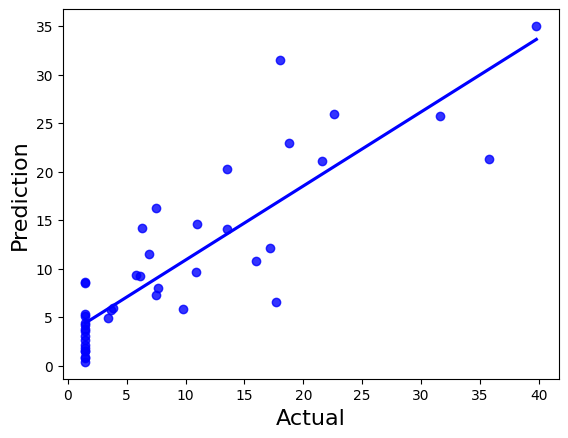

In [51]:
# Visualize performance of selected combination
selected_combi = ['Net_FDI_2020', 'Access_To_Electricity_2020', 'Fertility_Rate_2020', 'Corruption_Perception_Index_2020']
output_names = ['Prevalence_of_undernourishment_2020']

df_features, df_target = get_features_targets(df, selected_combi, output_names)
n = len(df_features.columns)
df_features, df_target = remove_outliers(df_features, df_target)

df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, 100, 0.3)

target = prepare_target(df_target_test)
pred = predict(df_features_test, betas[str(selected_combi)])

myplot = sns.regplot(x=target,y=pred,ci=None,color='blue')
myplot.set_xlabel('Actual', fontsize=16)
myplot.set_ylabel('Prediction', fontsize=16)


### Variable transformation

1. Visualize correlation & distribution of data
2. Test different transformations of dependent variable
3. Test different transformations of independent variables

**Visualization**

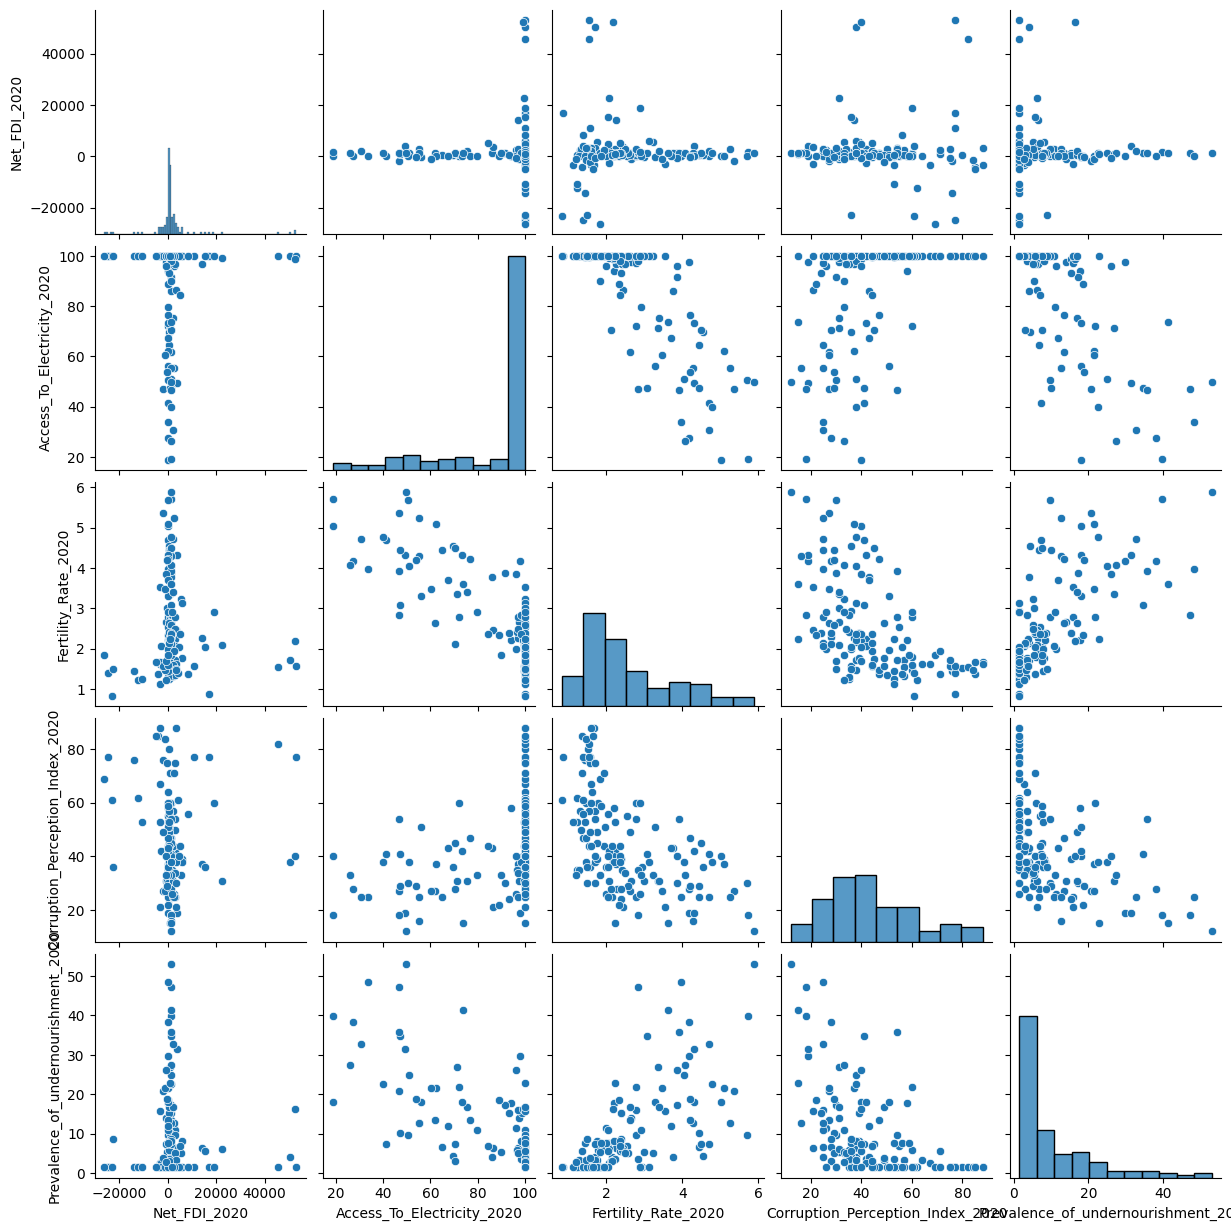

In [52]:
sns.pairplot(data=pd.concat([df_features, df_target], axis=1))

**Transformation of dependent variable** <br>

We observed a **significant right skew** in the distribution of  'Prevalence_of_undernourishment'. To improve model performance, we tested 3 transformation functions:

1. Log transformation (np.log)
2. N-root transformation (np.sqrt, np.cbrt)
3. Reciprocal transformation (1 / values)

We performed min-max prior to all transformations to rescale our data into range [0, 1] while preserving the relationships among the original data values.

Our results showed that **reciprocal transformation** gives the best performance, **improving the adjusted R2 score from 0.70 to 0.73**. This conforms to reference [1] which suggests that reciprocal transformation is the most suitable for severely skewed data.

References: <br>
[1] [Transform Data to Normal Distribution in R](https://www.datanovia.com/en/lessons/transform-data-to-normal-distribution-in-r/) <br>
[2] [Linear Regression Models with Logarithmic Transformations](https://kenbenoit.net/assets/courses/ME104/logmodels2.pdf) <br>
[3] [Feature Transformation for Multiple Linear Regression in Python](https://towardsdatascience.com/feature-transformation-for-multiple-linear-regression-in-python-8648ddf070b8) <br>
[4] [Methods to deal with zero values while performing log transformation of variable](https://discuss.analyticsvidhya.com/t/methods-to-deal-with-zero-values-while-performing-log-transformation-of-variable/2431)

<AxesSubplot: xlabel='Prevalence_of_undernourishment_2020', ylabel='Density'>

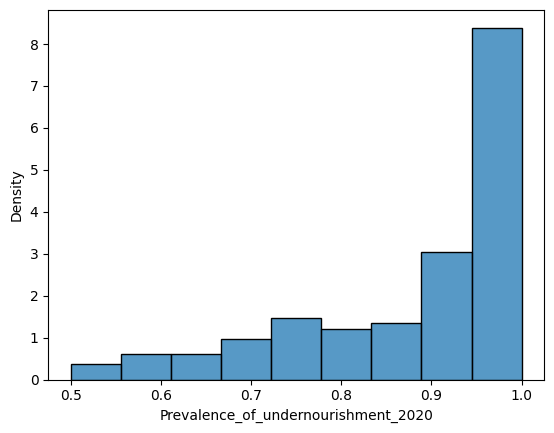

In [61]:
# Visualize distribution of data after selected transformation

df_target = df[output_names[0]].copy()
# Min-max scaling 
df_target = (df_target - df_target.min()) / (df_target.max() - df_target.min())
# Reciprocal transformation
df_target = 1 / (df_target+1) # plus arbitrary constant to avoid zero division error
sns.histplot(df_target, stat="density")

0.7309203393366643


Text(0, 0.5, 'Prediction')

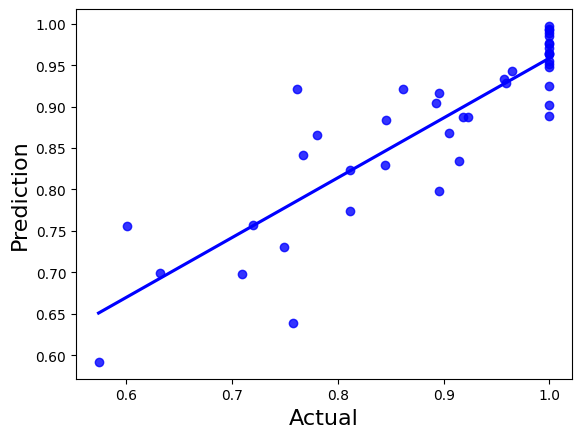

In [64]:
# Model performance after transforming the dependent variable
df_features, df_target = get_features_targets(df, selected_combi, output_names)
n = len(df_features.columns)
df_features, df_target = remove_outliers(df_features, df_target)

df_target = (df_target - df_target.min()) / (df_target.max() - df_target.min())
df_target = 1 / (df_target+1)

df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, 100, 0.3)
df_features_train_z = normalize_z(df_features_train)

X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((n+1,1))

beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
pred = predict(df_features_test, beta)

# Evaluate the model 
target = prepare_target(df_target_test)
adj_r2 = adjusted_r2_score(target, pred, n)
print(adj_r2) # no MAE since data values for dependent variable have been disorted

myplot = sns.regplot(x=target,y=pred,ci=None,color='blue')
myplot.set_xlabel('Actual', fontsize=16)
myplot.set_ylabel('Prediction', fontsize=16)

**Transformation of independent variables** <br>

We observed a **significant right skew** in the distribution of  'Prevalence_of_undernourishment'. To improve model performance, we tested 3 transformation functions:

1. Log transformation (np.log)
2. N-root transformation (np.sqrt, np.cbrt)
3. Reciprocal transformation (1 / values)

We performed min-max prior to all transformations to rescale our data into range [0, 1] while preserving the relationships among the original data values.

Our results showed that **reciprocal transformation** gives the best performance, **improving the adjusted R2 score from 0.70 to 0.73**. This conforms to reference [1] which suggests that reciprocal transformation is the most suitable for severely skewed data.

References: <br>
[1] [Transform Data to Normal Distribution in R](https://www.datanovia.com/en/lessons/transform-data-to-normal-distribution-in-r/) <br>
[2] [Linear Regression Models with Logarithmic Transformations](https://kenbenoit.net/assets/courses/ME104/logmodels2.pdf) <br>
[3] [Feature Transformation for Multiple Linear Regression in Python](https://towardsdatascience.com/feature-transformation-for-multiple-linear-regression-in-python-8648ddf070b8) <br>
[4] [Methods to deal with zero values while performing log transformation of variable](https://discuss.analyticsvidhya.com/t/methods-to-deal-with-zero-values-while-performing-log-transformation-of-variable/2431)

0.737677664544101


<AxesSubplot: >

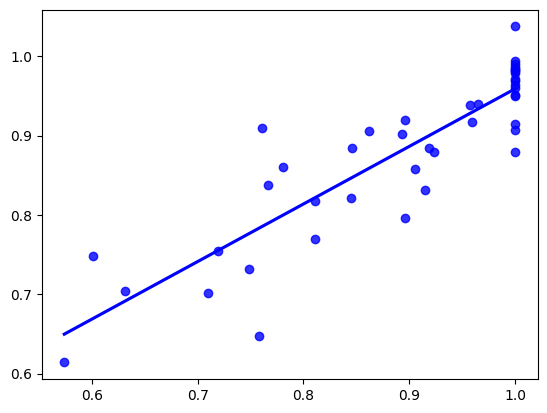

In [59]:
df_features, df_target = get_features_targets(df, selected_combi, output_names)
n = len(df_features.columns)
df_features, df_target = remove_outliers(df_features, df_target)

df_target = (df_target - df_target.min()) / (df_target.max() - df_target.min())
df_target = 1 / (df_target+1)#np.log(df_target+1)

df_features[selected_combi[2]] = 1 / df_features[selected_combi[2]]

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, 100, 0.3)

# Normalize the features using z normalization
df_features_train_z = normalize_z(df_features_train)

# Change the features and the target to numpy array using the prepare functions
X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((n+1,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# call the predict() method
pred = predict(df_features_test, beta)

# Evaluate the model 
target = prepare_target(df_target_test)
adj_r2 = adjusted_r2_score(target, pred, n)
mae = mean_absolute_error(target, pred)
print(adj_r2)

sns.regplot(x=target,y=pred,ci=None,color='blue')

c:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


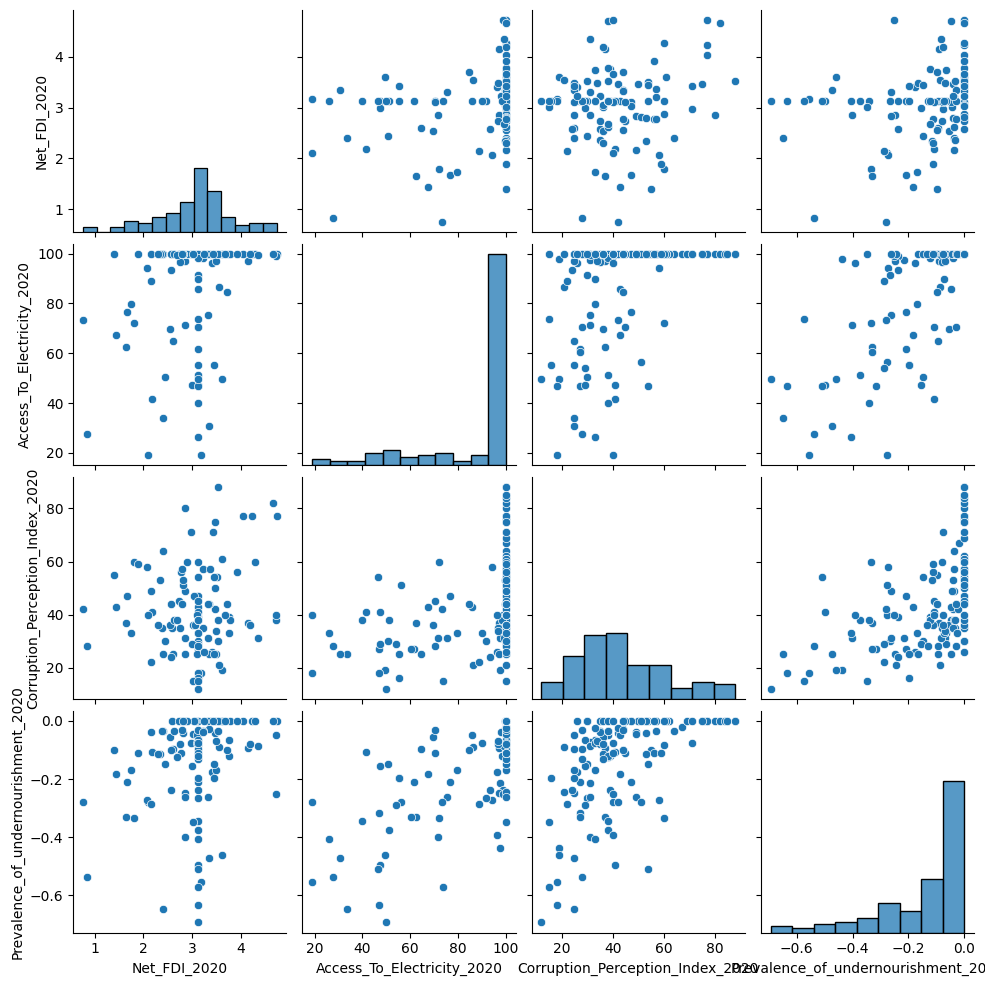

In [ ]:
df_features, df_target = get_features_targets(df, selected_combi, output_names)
n = len(df_features.columns)
df_features, df_target = remove_outliers(df_features, df_target)

df_target = (df_target - df_target.min()) / (df_target.max() - df_target.min())
df_target = -np.log(df_target+1)

df_features[selected_combi[0]] = np.log10(df_features[selected_combi[0]])
#df_features[selected_combi[2]] = 1 / df_features[selected_combi[2]]

sns.pairplot(data=pd.concat([df_features, df_target], axis=1))